In [1]:
import numpy as np
import xarray as xr
from modules.ADI import ADI
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation, calculate_boundary_flux, integrate_concentration
import matplotlib.pyplot as plt

In [2]:
# Initialize a constant diffusion coefficient function
'''
diffusion = Analytic(lambda x, y: y**2)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)
'''


'\ndiffusion = Analytic(lambda x, y: y**2)\ndiffusion.set_partial_x(lambda x, y: y)\ndiffusion.set_partial_y(lambda x, y: x)\n'

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

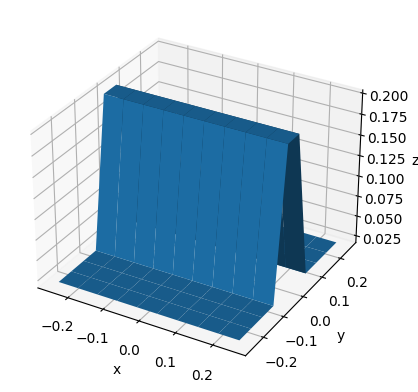

In [3]:
n_grid = 50
n_time = 1000
dt = 0.0001
dx = 0.01
dy = 0.01
conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')

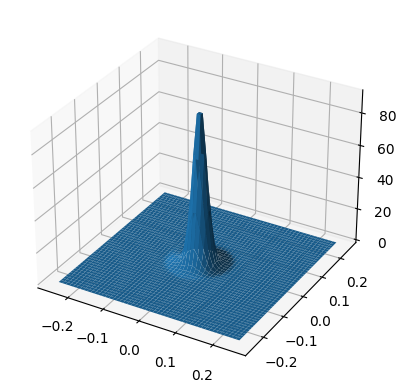

In [4]:
xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  100*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [5]:
result_ds = ADI(conc, diffusion, initial_condition)
# Issue with explicit component vectors blowing up to infinity/nan values

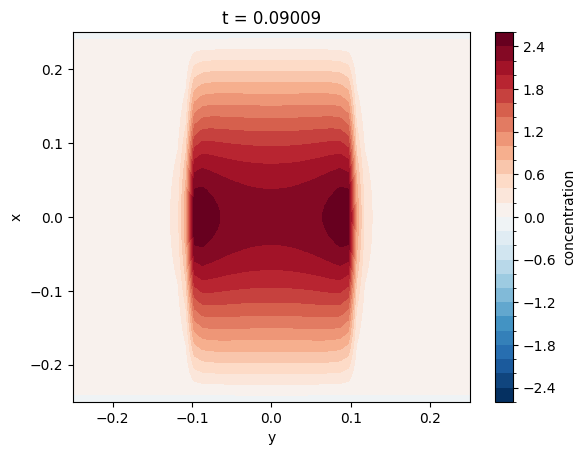

In [6]:
xr.plot.contourf(result_ds.isel(t=900), levels=30)

2.0308319189794268e-38
-2.948252990478904e-23
-2.368553639525328e-21
-8.471891006514617e-20
-1.8063763103947787e-18
-2.6000905385507543e-17
-2.719524643361455e-16
-2.176957757058982e-15
-1.3885715597105259e-14
-7.293539485703005e-14
-3.2423776207813734e-13
-1.2483178100481438e-12
-4.243329360518679e-12
-1.2943644298336919e-11
-3.591780422212884e-11
-9.17228409364299e-11
-2.1767364733185595e-10
-4.840698242592197e-10
-1.015951074579055e-09
-2.0246669000748624e-09
-3.851597145528788e-09
-7.026214487988709e-09
-1.2340328626827754e-08
-2.0939808660024453e-08
-3.443437976835585e-08
-5.502528313434542e-08
-8.564973287234725e-08
-1.301402611710864e-07
-1.9339626890809705e-07
-2.8156444058924e-07
-4.0222417437409534e-07
-5.645738415444038e-07
-7.796135332129698e-07
-1.0603199715958442e-06
-1.4218094451596061e-06
-1.8814849503616993e-06
-2.45916416157587e-06
-3.1771853766604453e-06
-4.0604891695538066e-06
-5.136674095566687e-06
-6.4360254144721065e-06
-7.991516399198852e-06
-9.838782365863075e-

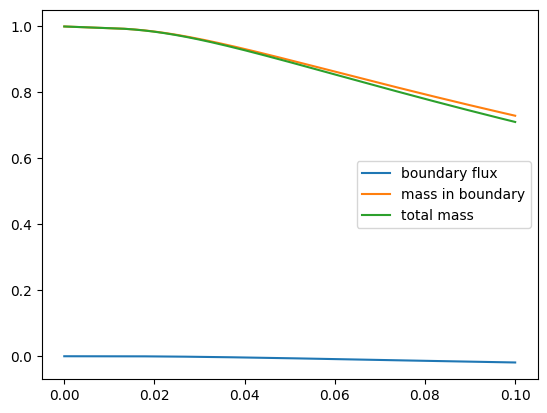

In [7]:
fig, ax = plot_mass_conservation(result_ds)

In [8]:
bflux = calculate_boundary_flux(result_ds)
tconc = integrate_concentration(result_ds)
print(bflux)
print(tconc)

2.0308319189794268e-38
-2.948252990478904e-23
-2.368553639525328e-21
-8.471891006514617e-20
-1.8063763103947787e-18
-2.6000905385507543e-17
-2.719524643361455e-16
-2.176957757058982e-15
-1.3885715597105259e-14
-7.293539485703005e-14
-3.2423776207813734e-13
-1.2483178100481438e-12
-4.243329360518679e-12
-1.2943644298336919e-11
-3.591780422212884e-11
-9.17228409364299e-11
-2.1767364733185595e-10
-4.840698242592197e-10
-1.015951074579055e-09
-2.0246669000748624e-09
-3.851597145528788e-09
-7.026214487988709e-09
-1.2340328626827754e-08
-2.0939808660024453e-08
-3.443437976835585e-08
-5.502528313434542e-08
-8.564973287234725e-08
-1.301402611710864e-07
-1.9339626890809705e-07
-2.8156444058924e-07
-4.0222417437409534e-07
-5.645738415444038e-07
-7.796135332129698e-07
-1.0603199715958442e-06
-1.4218094451596061e-06
-1.8814849503616993e-06
-2.45916416157587e-06
-3.1771853766604453e-06
-4.0604891695538066e-06
-5.136674095566687e-06
-6.4360254144721065e-06
-7.991516399198852e-06
-9.838782365863075e-

In [9]:
from modules.tests import test_gaussian
import xarray as xr
output, ads = test_gaussian()

In [10]:
diff = (output - ads)/ads

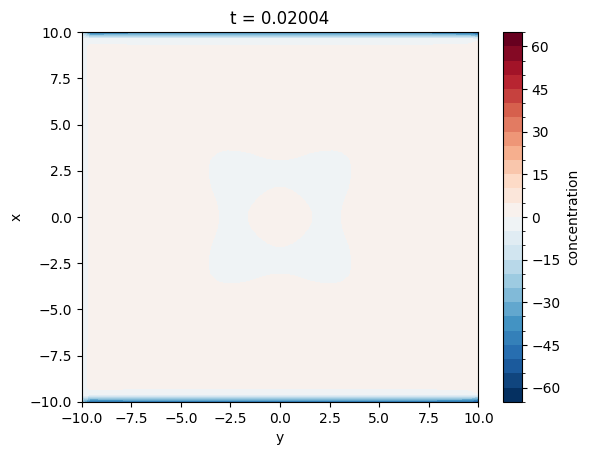

In [11]:
xr.plot.contourf(diff.isel(t=10), levels=30)

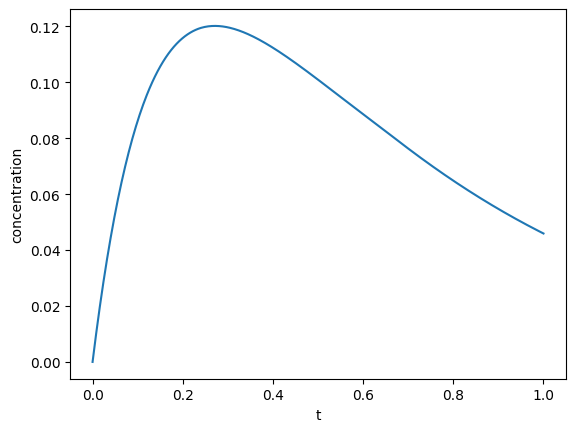

In [12]:
diff.median(dim=('x','y')).plot()

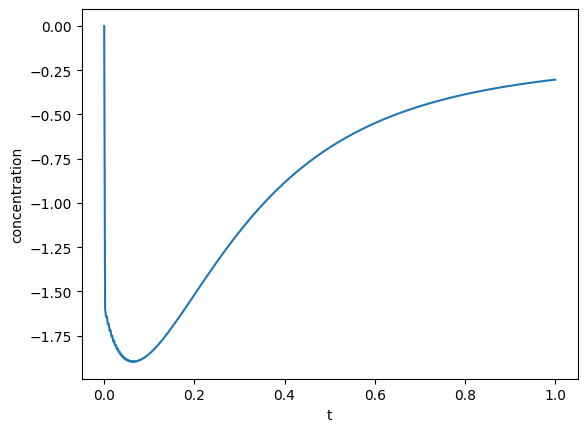

In [13]:
diff.mean(dim=('x','y')).plot()